In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

2024-07-30 07:37:22.086838: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 07:37:22.086969: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 07:37:22.467294: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-30 07:37:23.531901: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df  = pd.read_csv('customer_chrn_dataset.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


looking at some facts about the data 

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.drop('customerID', inplace=True, axis = 1)

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
def to_num(value):
    if value == ' ': # as we have some values in the sereis contains Empty strings :)
        return 
    else:
        return float(value)

In [8]:
#Using pd.to_numeric() with errors='coerce' 
#will automatically convert empty strings and any non-numeric values to NaN.
pd.to_numeric(df['TotalCharges'], errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
# we will drop these 11 Rows, it will have no effect on the data 
rows_to_drop = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()].index.to_list()

In [11]:
df = df.drop(rows_to_drop)

In [12]:
df.shape

(7032, 20)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [14]:
# after Dropping those rows it would be eaasier for us to convert the series into float values 

df['TotalCharges'] = df['TotalCharges'].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

Quick Visualization

<Axes: xlabel='Churn', ylabel='tenure'>

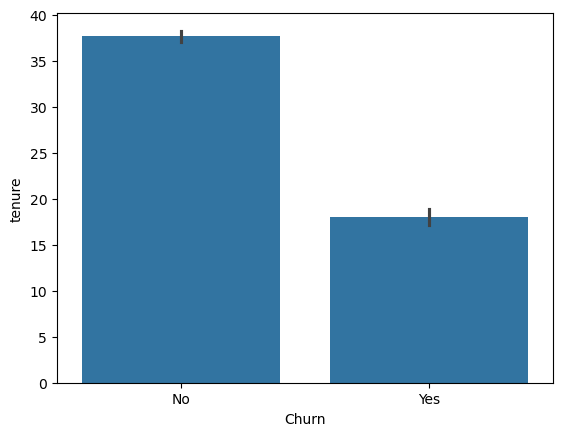

In [16]:
# Tenure : How loyal the cusomer is, we would like to see the relation ship between tenure and churn
sns.barplot(x = df['Churn'], y = df['tenure'])

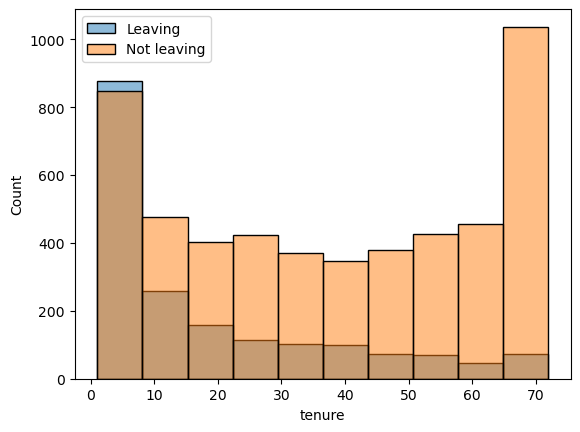

In [17]:
# histogram might also help 
fig ,ax = plt.subplots()
sns.histplot(df[df['Churn'] == 'Yes']['tenure'],bins=10 ,ax = ax, alpha = 0.5, label = 'Leaving')
sns.histplot(df[df['Churn'] == 'No']['tenure'], ax = ax,bins=10 , alpha = 0.5, label = 'Not leaving')
ax.legend()

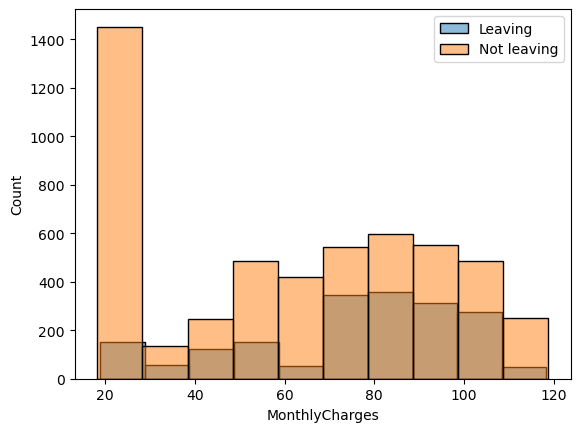

In [18]:
# histogram might also help 
fig ,ax = plt.subplots()
sns.histplot(df[df['Churn'] == 'Yes']['MonthlyCharges'],bins=10 ,ax = ax, alpha = 0.5, label = 'Leaving')
sns.histplot(df[df['Churn'] == 'No']['MonthlyCharges'], ax = ax,bins=10 , alpha = 0.5, label = 'Not leaving')
ax.legend()

In [19]:
data = []
for column in df.columns:
    unique_values = df[column].unique()
    data.append({'Column_name':column, 'Unique_values':unique_values})
pd.DataFrame(data)

,Column_name,Unique_values
0,gender,"[Female, Male]"
1,SeniorCitizen,"[0, 1]"
2,Partner,"[Yes, No]"
3,Dependents,"[No, Yes]"
4,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
5,PhoneService,"[No, Yes]"
6,MultipleLines,"[No phone service, No, Yes]"
7,InternetService,"[DSL, Fiber optic, No]"
8,OnlineSecurity,"[No, Yes, No internet service]"
9,OnlineBackup,"[Yes, No, No internet service]"


In [20]:
# lets reduece the above to print only the categorical columns
for column in df.columns:
    if df[column].dtypes == 'object':
        print(column, df[column].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


Checking the Target Variable

We are trying to predict if the client left the company in the previous month. Therefore we have a binary classification problem with a slightly unbalanced target:

Churn: No - 72.4%

Churn: Yes - 27.6%

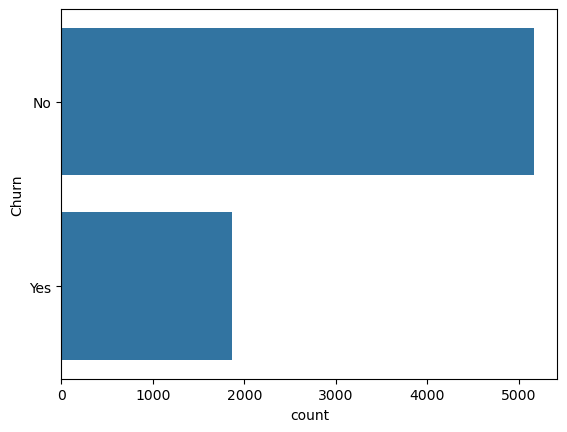

In [21]:
sns.countplot(df['Churn'])
plt.show()

Numerical Features

In [22]:
# How many numerical Features we have ? 3 numerical Features (Tenure, MonthlyCharges, TotalCharges)
def kde_numerical(feature):
    sns.kdeplot(df[df['Churn'] == 'Yes'][feature],color='red' , label = 'Left the company')
    sns.kdeplot(df[df['Churn'] == 'No'][feature],color = 'blue' ,label = "Didn't leave")
    plt.legend()
    plt.title(f'{feature} distribution')
    plt.show()


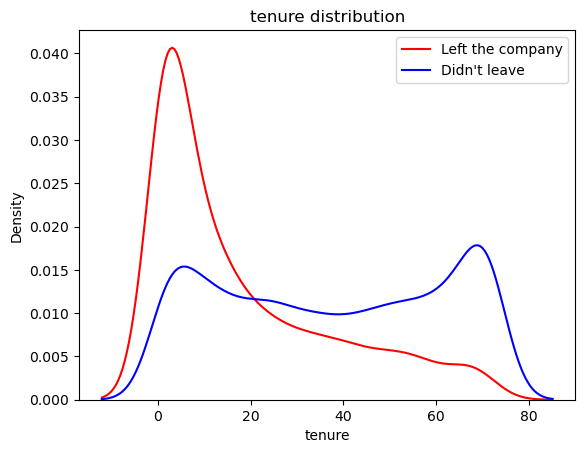

In [23]:
kde_numerical('tenure')

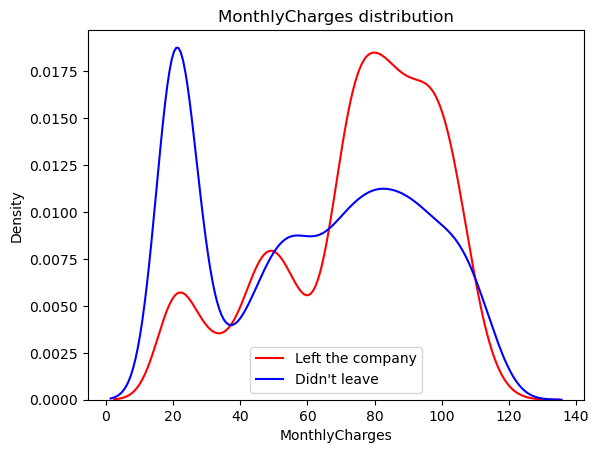

In [24]:
kde_numerical('MonthlyCharges')

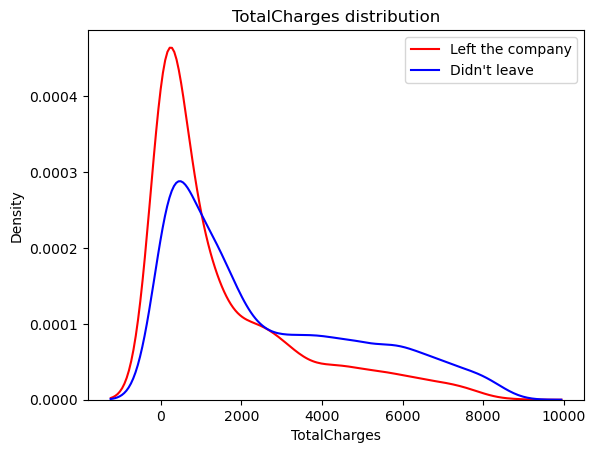

In [25]:
kde_numerical('TotalCharges')

From the plots above we can conclude that:

- Recent clients are more likely to churn
- Clients with higher MonthlyCharges are also more likely to churn
- Tenure and MonthlyCharges are probably important features


Categorical Features

This dataset has 16 categorical features:

- Six binary features (Yes/No)
- Nine features with three unique values each (categories)
- One feature with four unique values

In [26]:
def cat_feat_heatmap (feature):
    groupby = df.groupby(feature)['Churn'].value_counts().reset_index()
    print(f'GROUP {feature} BY Churn')
    print(groupby)
    print('-----------------------------------')
    crosstable = pd.crosstab(df[feature], df['Churn'])
    sns.heatmap(crosstable.apply(lambda x : x/len(df) * 100), annot = True)
    plt.title(f"{feature} vs Churn in %")
    print(crosstable)

GROUP SeniorCitizen BY Churn
   SeniorCitizen Churn  count
0              0    No   4497
1              0   Yes   1393
2              1    No    666
3              1   Yes    476
-----------------------------------
Churn            No   Yes
SeniorCitizen            
0              4497  1393
1               666   476


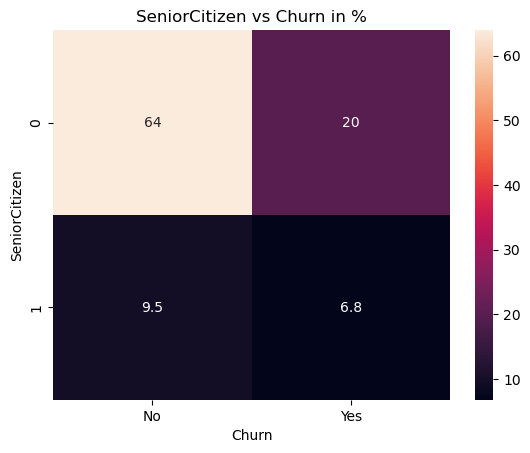

In [27]:
cat_feat_heatmap('SeniorCitizen')

GROUP gender BY Churn
   gender Churn  count
0  Female    No   2544
1  Female   Yes    939
2    Male    No   2619
3    Male   Yes    930
-----------------------------------
Churn     No  Yes
gender           
Female  2544  939
Male    2619  930


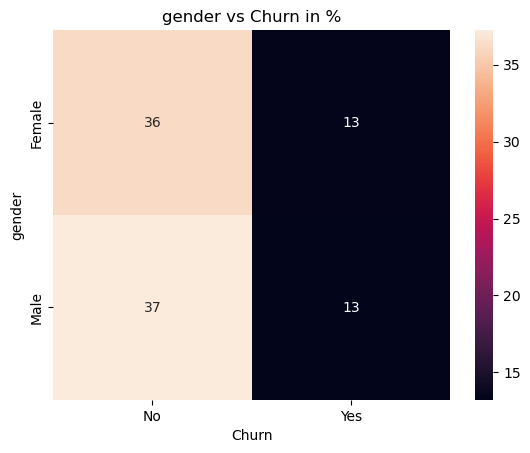

In [28]:
cat_feat_heatmap('gender')

- Gender is not an indicative of churn.

- SeniorCitizens are only 16% of customers, but they have a much higher churn rate: 42% against 23% for non-senior customers.

- There are no special relations between this categorical values and the main numerical features.

partner and dependents

In [29]:
def crosstable_groupby (feature, data = df):
    g_count = df.groupby(feature)['Churn'].value_counts().to_frame()
    g_percentage = df.groupby(feature)['Churn'].value_counts().to_frame()/len(df) * 100
    g_count.reset_index(inplace = True)
    g_percentage.reset_index(inplace = True)
    g_percentage.rename({'count':'Percentage_of_Cusomters'},axis = 1, inplace = True)
    print('Table that shows the Count of Customers')
    display(g_count)
    print('Table that shows the percentages of Cusomers')
    display(g_percentage)
    color_pallette = {'Yes': 'red', 'No': 'blue'}
    plt.figure(figsize=(10, 5))
    sns.barplot(x = g_percentage[feature], y = g_percentage['Percentage_of_Cusomters'], hue=g_percentage['Churn'], palette=color_pallette)
    yticks = plt.gca().get_yticks()
    plt.gca().set_yticklabels([f'{int(tick)}%' for tick in yticks])
    plt.show
    print('Cross Table Heatmap')
    cross_t = pd.crosstab(df[feature], df['Churn'])
    plt.figure()
    sns.heatmap(cross_t, annot=True, fmt = '.0f')
    plt.show

Table that shows the Count of Customers


,Dependents,Churn,count
0,No,No,3390
1,No,Yes,1543
2,Yes,No,1773
3,Yes,Yes,326


Table that shows the percentages of Cusomers


,Dependents,Churn,Percentage_of_Cusomters
0,No,No,48.208191
1,No,Yes,21.942548
2,Yes,No,25.213311
3,Yes,Yes,4.635950


Cross Table Heatmap


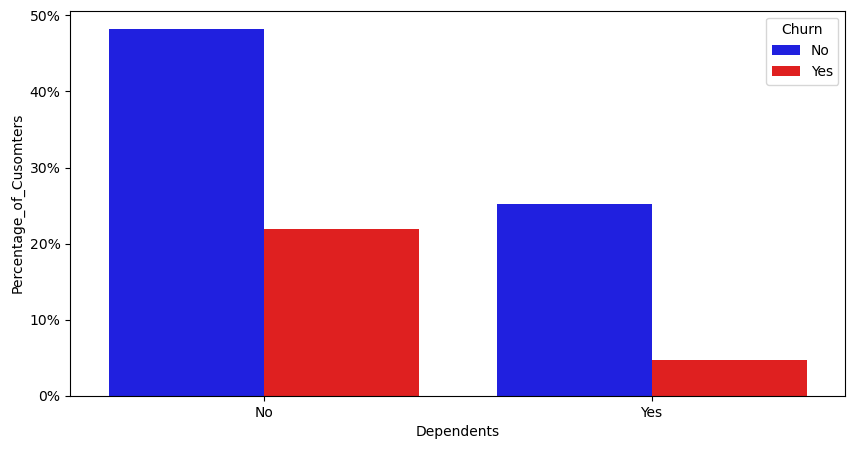

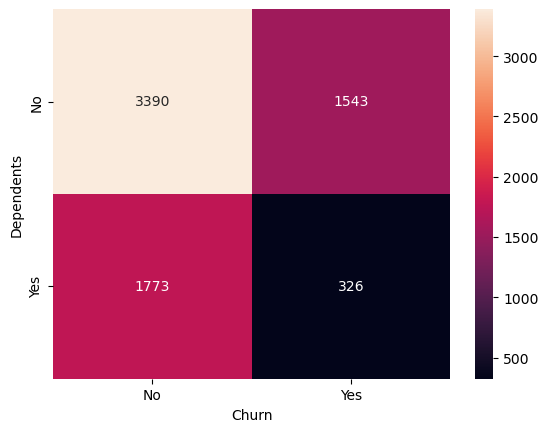

In [30]:
crosstable_groupby('Dependents')

Table that shows the Count of Customers


,gender,Churn,count
0,Female,No,2544
1,Female,Yes,939
2,Male,No,2619
3,Male,Yes,930


Table that shows the percentages of Cusomers


,gender,Churn,Percentage_of_Cusomters
0,Female,No,36.177474
1,Female,Yes,13.353242
2,Male,No,37.244027
3,Male,Yes,13.225256


Cross Table Heatmap


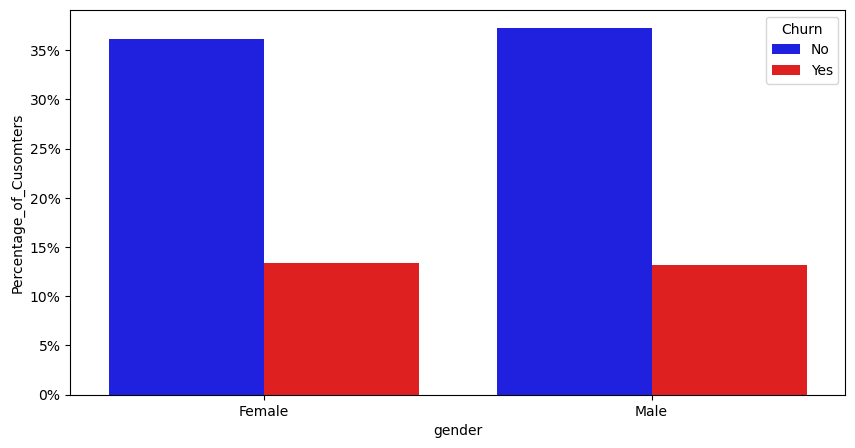

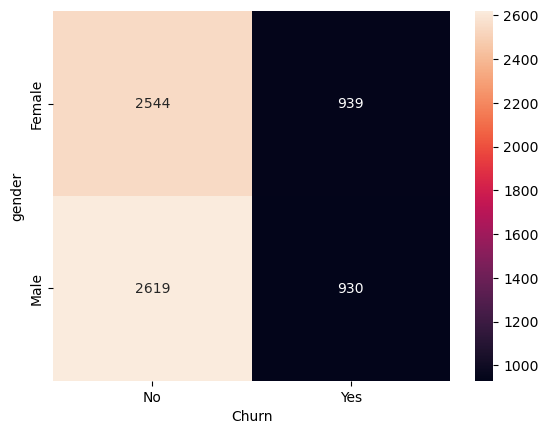

In [31]:
crosstable_groupby('gender')

In [32]:
def crosstable_groupby_two (feature1, feature2, data = df):
    g_count = df.groupby(feature1)[feature2].value_counts().to_frame()
    g_percentage = df.groupby(feature1)[feature2].value_counts().to_frame()/len(df) * 100
    g_count.reset_index(inplace = True)
    g_percentage.reset_index(inplace = True)
    g_percentage.rename({'count':'Percentage_of_Cusomters'},axis = 1, inplace = True)
    print('Table that shows the Count of Customers')
    display(g_count)
    print('Table that shows the percentages of Cusomers')
    display(g_percentage)
    # color_pallette = {'Yes': 'red', 'No': 'blue'}
    plt.figure()
    sns.barplot(x = g_percentage[feature1], y = g_percentage['Percentage_of_Cusomters'], hue=g_percentage[feature2])
    yticks = plt.gca().get_yticks()
    plt.gca().set_yticklabels([f'{int(tick)}%' for tick in yticks])
    plt.show
    print('Cross Table Heatmap')
    cross_t = pd.crosstab(df[feature1], df[feature2])
    plt.figure()
    sns.heatmap(cross_t, annot=True, fmt = '.0f')
    plt.show

Table that shows the Count of Customers


,Dependents,Partner,count
0,No,No,3280
1,No,Yes,1653
2,Yes,Yes,1740
3,Yes,No,359


Table that shows the percentages of Cusomers


,Dependents,Partner,Percentage_of_Cusomters
0,No,No,46.643914
1,No,Yes,23.506826
2,Yes,Yes,24.744027
3,Yes,No,5.105233


Cross Table Heatmap


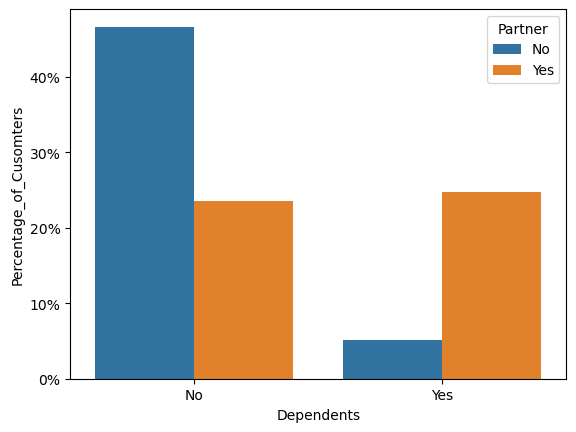

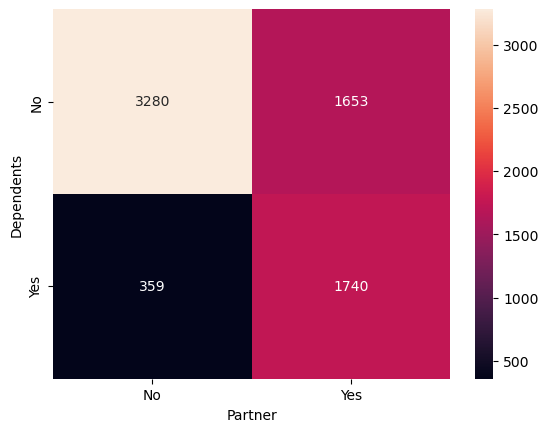

In [33]:
crosstable_groupby_two('Dependents', 'Partner')

Table that shows the Count of Customers


,gender,Churn,count
0,Female,No,2544
1,Female,Yes,939
2,Male,No,2619
3,Male,Yes,930


Table that shows the percentages of Cusomers


,gender,Churn,Percentage_of_Cusomters
0,Female,No,36.177474
1,Female,Yes,13.353242
2,Male,No,37.244027
3,Male,Yes,13.225256


Cross Table Heatmap


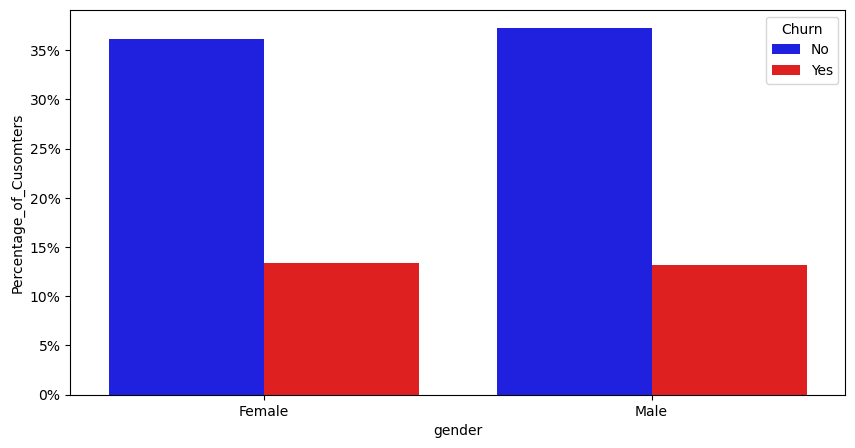

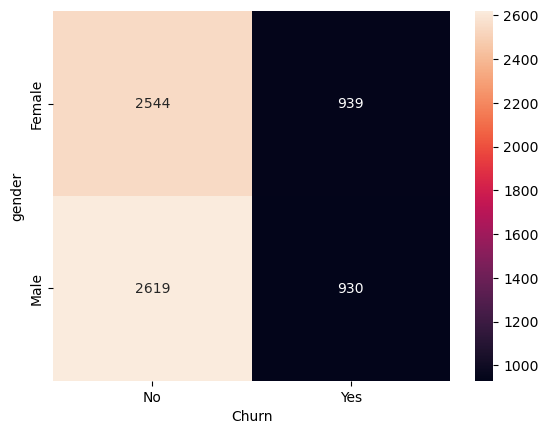

In [34]:
crosstable_groupby('gender')

The p-value from the Chi-Square test tells us whether there is a statistically significant association between two categorical variables, in this case, `Gender` and `Churn`.
### Interpretation of the P-Value 

A p-value is a probability measure that helps determine the significance of your results in relation to a null hypothesis. In the context of the Chi-Square test:
 
- **Null Hypothesis (H0)** : There is no association between `Gender` and `Churn`. This means that gender does not influence the likelihood of churn.
 
- **Alternative Hypothesis (H1)** : There is an association between `Gender` and `Churn`. This means that gender does influence the likelihood of churn.

The typical threshold (alpha level) for significance is 0.05.

### Given P-Value: 0.4904884707065509 
 
- **P-Value > 0.05** : If the p-value is greater than 0.05, we fail to reject the null hypothesis.
 
- **P-Value < 0.05** : If the p-value is less than 0.05, we reject the null hypothesis.

#### Interpretation: 

Since the p-value is 0.4904884707065509, which is much greater than 0.05, we fail to reject the null hypothesis. This means:
 
1. **There is no significant association between gender and churn**  in your dataset.
 
2. **Gender does not appear to influence whether a customer churns or not** .


In [35]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['gender'], df['Churn']))
print(p)

0.4904884707065509


let's look at other categorical features and there chi-square p-values 

Table that shows the Count of Customers


,MultipleLines,Churn,count
0,No,No,2536
1,No,Yes,849
2,No phone service,No,510
3,No phone service,Yes,170
4,Yes,No,2117
5,Yes,Yes,850


Table that shows the percentages of Cusomers


,MultipleLines,Churn,Percentage_of_Cusomters
0,No,No,36.063709
1,No,Yes,12.073379
2,No phone service,No,7.252560
3,No phone service,Yes,2.417520
4,Yes,No,30.105233
5,Yes,Yes,12.087600


Cross Table Heatmap


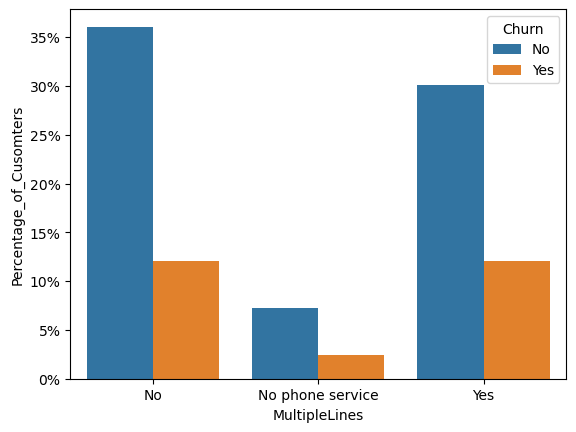

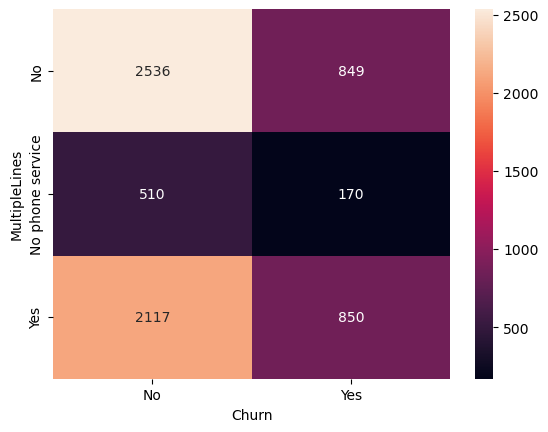

In [36]:
crosstable_groupby_two('MultipleLines', 'Churn')

- 3385  of the customers don't have multiplelines.
- 680 of the cusomers don't have Phone service.

In [37]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['MultipleLines'], df['Churn']))
print(p)

0.0035679273999811405


Let's see How MultipleLines affect the Monthly charges ! 

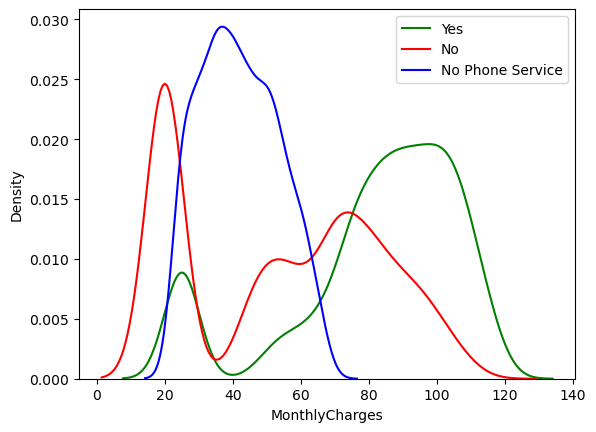

In [38]:
sns.kdeplot(df[df['MultipleLines'] == 'Yes']['MonthlyCharges'], label = 'Yes', color = 'green')
sns.kdeplot(df[df['MultipleLines'] == 'No']['MonthlyCharges'], label = 'No', color = 'red')
sns.kdeplot(df[df['MultipleLines'] == 'No phone service']['MonthlyCharges'], label = 'No Phone Service', color = 'blue')
plt.legend()
plt.show()

<Axes: xlabel='MonthlyCharges'>

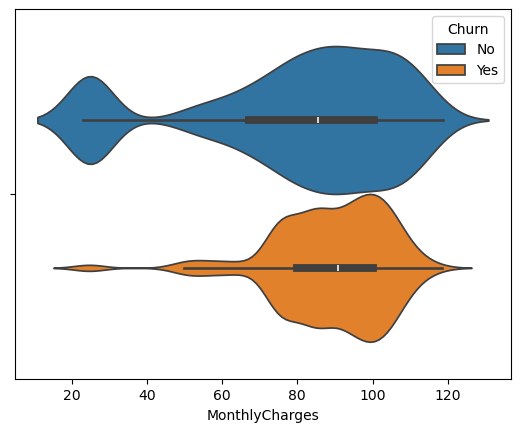

In [39]:
sns.violinplot(x = df[df['MultipleLines'] == 'Yes']['MonthlyCharges'], hue=df['Churn'])

<Axes: xlabel='MultipleLines', ylabel='MonthlyCharges'>

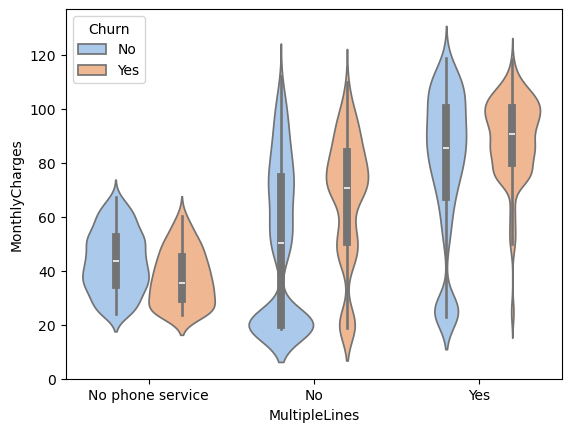

In [40]:
sns.violinplot(x = df['MultipleLines'], y = df['MonthlyCharges'], hue=df['Churn'], split=False, palette='pastel')

Table that shows the Count of Customers


,InternetService,Churn,count
0,DSL,No,1957
1,DSL,Yes,459
2,Fiber optic,No,1799
3,Fiber optic,Yes,1297
4,No,No,1407
5,No,Yes,113


Table that shows the percentages of Cusomers


,InternetService,Churn,Percentage_of_Cusomters
0,DSL,No,27.829920
1,DSL,Yes,6.527304
2,Fiber optic,No,25.583049
3,Fiber optic,Yes,18.444255
4,No,No,20.008532
5,No,Yes,1.606940


Cross Table Heatmap


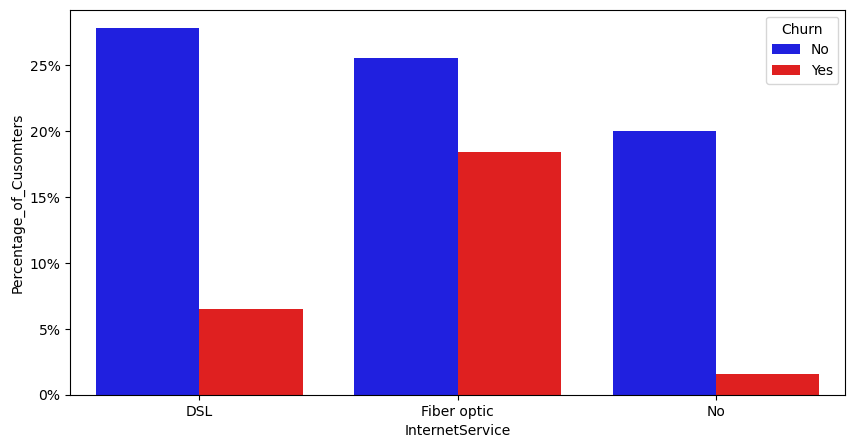

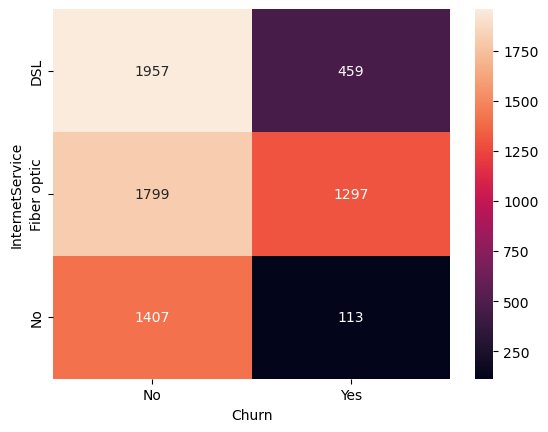

In [41]:
crosstable_groupby('InternetService')

- Clients without internet have a very low churn rate
- Customers with fiber are more probable to churn than those with DSL connection
- It's interesting how customers with DSL (slower connection) and higher charges are less probable to churn.

In [42]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

In [43]:
# Listing all the customers (by columns mentioned above) who have internet service (FiberOptic or DSL)

df1 = df[df['InternetService'] != 'No'][cols]
df1

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,Yes,No,No,No,No
1,Yes,No,Yes,No,No,No
2,Yes,Yes,No,No,No,No
3,Yes,No,Yes,Yes,No,No
4,No,No,No,No,No,No
...,...,...,...,...,...,...
7038,Yes,No,Yes,Yes,Yes,Yes
7039,No,Yes,Yes,No,Yes,Yes
7040,Yes,No,No,No,No,No
7041,No,No,No,No,No,No


In [44]:
df1 = pd.melt(df1)
df1.rename({'value': 'Has Service'},axis = 1, inplace = True)

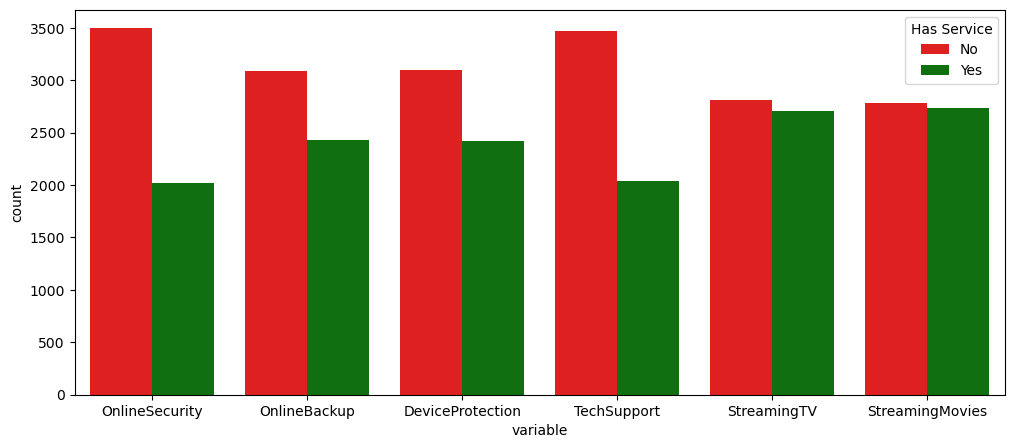

In [45]:
plt.figure(figsize=(12,5))
col_pal = {'Yes': 'green', 'No':'red'}
sns.countplot(x= df1['variable'], hue=df1['Has Service'], palette=col_pal)
plt.show()

In [46]:
# All customers who have internet service and churned - we are interested in knowing the curn count for these customers
df2 = df[(df['InternetService'] != 'No') & (df['Churn'] == 'Yes')][cols]
df2

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
2,Yes,Yes,No,No,No,No
4,No,No,No,No,No,No
5,No,No,Yes,No,Yes,Yes
8,No,No,Yes,Yes,Yes,Yes
13,No,Yes,Yes,No,Yes,Yes
...,...,...,...,...,...,...
7021,No,No,No,Yes,Yes,No
7026,No,No,No,No,No,No
7032,No,No,No,No,No,No
7034,Yes,Yes,Yes,No,Yes,No


In [47]:
df2 = pd.melt(df2)
df2

,variable,value
0,OnlineSecurity,Yes
1,OnlineSecurity,No
2,OnlineSecurity,No
3,OnlineSecurity,No
4,OnlineSecurity,No
...,...,...
10531,StreamingMovies,No
10532,StreamingMovies,No
10533,StreamingMovies,No
10534,StreamingMovies,No


In [48]:
df2.rename({'value' : 'Has internet Service?'} , axis = 1, inplace=True)
df2

,variable,Has internet Service?
0,OnlineSecurity,Yes
1,OnlineSecurity,No
2,OnlineSecurity,No
3,OnlineSecurity,No
4,OnlineSecurity,No
...,...,...
10531,StreamingMovies,No
10532,StreamingMovies,No
10533,StreamingMovies,No
10534,StreamingMovies,No


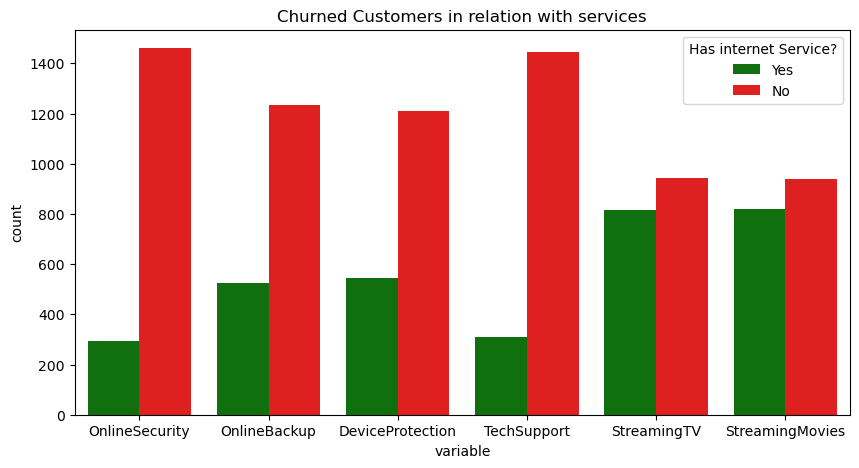

In [49]:
plt.figure(figsize=(10,5))

sns.countplot(x = df2['variable'], hue = df2['Has internet Service?'], palette=col_pal)
plt.title('Churned Customers in relation with services')
plt.show()

- Customers with the first 4 additionals (security to tech support) are more unlikely to churn

- Streaming service is not predictive for churn

In [50]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


PaperLess Billing and Contract Feature : 

Table that shows the Count of Customers


,PaperlessBilling,PaymentMethod,count
0,No,Mailed check,949
1,No,Bank transfer (automatic),653
2,No,Credit card (automatic),639
3,No,Electronic check,623
4,Yes,Electronic check,1742
5,Yes,Bank transfer (automatic),889
6,Yes,Credit card (automatic),882
7,Yes,Mailed check,655


Table that shows the percentages of Cusomers


,PaperlessBilling,PaymentMethod,Percentage_of_Cusomters
0,No,Mailed check,13.495449
1,No,Bank transfer (automatic),9.286121
2,No,Credit card (automatic),9.087031
3,No,Electronic check,8.859499
4,Yes,Electronic check,24.772469
5,Yes,Bank transfer (automatic),12.642207
6,Yes,Credit card (automatic),12.542662
7,Yes,Mailed check,9.314562


Cross Table Heatmap


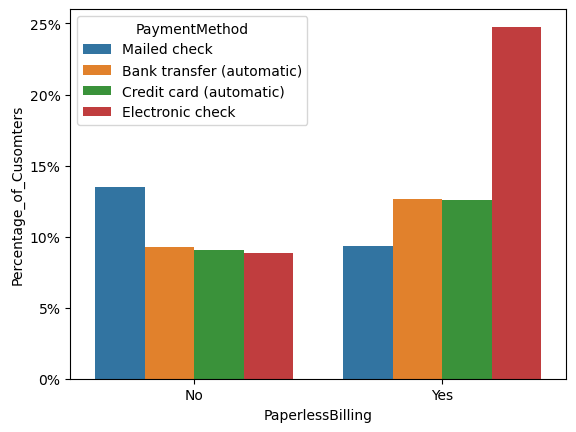

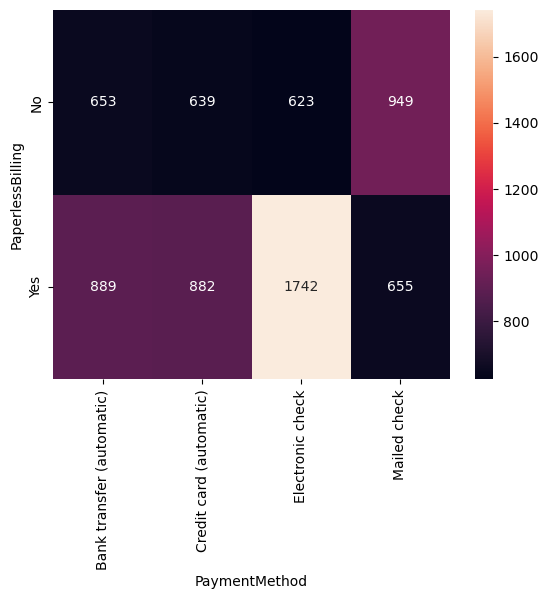

In [51]:
crosstable_groupby_two('PaperlessBilling', 'PaymentMethod')

In [52]:
df[df['Churn'] == 'Yes'][['PaymentMethod', 'PaperlessBilling']]

,PaymentMethod,PaperlessBilling
2,Mailed check,Yes
4,Electronic check,Yes
5,Electronic check,Yes
8,Electronic check,Yes
13,Bank transfer (automatic),Yes
...,...,...
7021,Electronic check,Yes
7026,Bank transfer (automatic),Yes
7032,Electronic check,Yes
7034,Credit card (automatic),Yes


Table that shows the Count of Customers


,PaymentMethod,Churn,count
0,Bank transfer (automatic),No,1284
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1289
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1296
7,Mailed check,Yes,308


Table that shows the percentages of Cusomers


,PaymentMethod,Churn,Percentage_of_Cusomters
0,Bank transfer (automatic),No,18.259386
1,Bank transfer (automatic),Yes,3.668942
2,Credit card (automatic),No,18.330489
3,Credit card (automatic),Yes,3.299204
4,Electronic check,No,18.401593
5,Electronic check,Yes,15.230375
6,Mailed check,No,18.430034
7,Mailed check,Yes,4.379977


Cross Table Heatmap


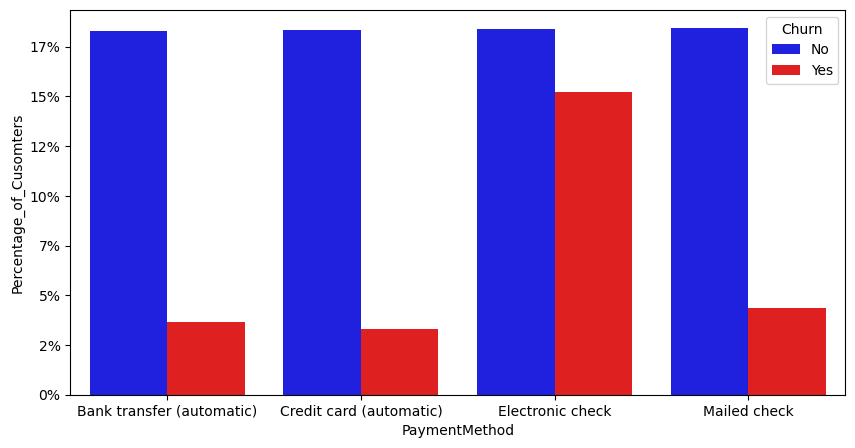

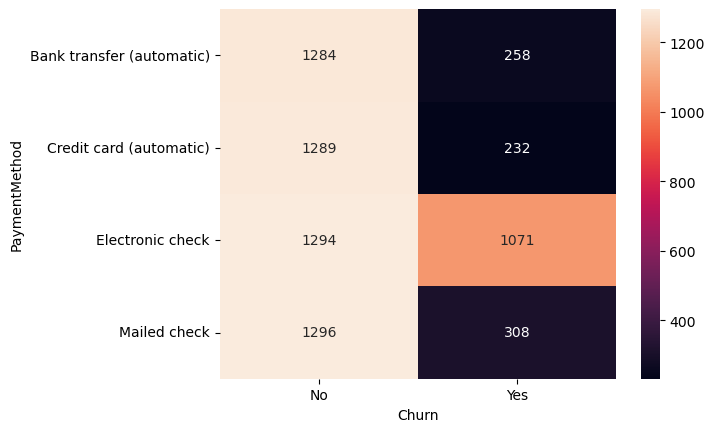

In [53]:
crosstable_groupby('PaymentMethod')

Table that shows the Count of Customers


,PaperlessBilling,Churn,count
0,No,No,2395
1,No,Yes,469
2,Yes,No,2768
3,Yes,Yes,1400


Table that shows the percentages of Cusomers


,PaperlessBilling,Churn,Percentage_of_Cusomters
0,No,No,34.058589
1,No,Yes,6.669511
2,Yes,No,39.362912
3,Yes,Yes,19.908987


Cross Table Heatmap


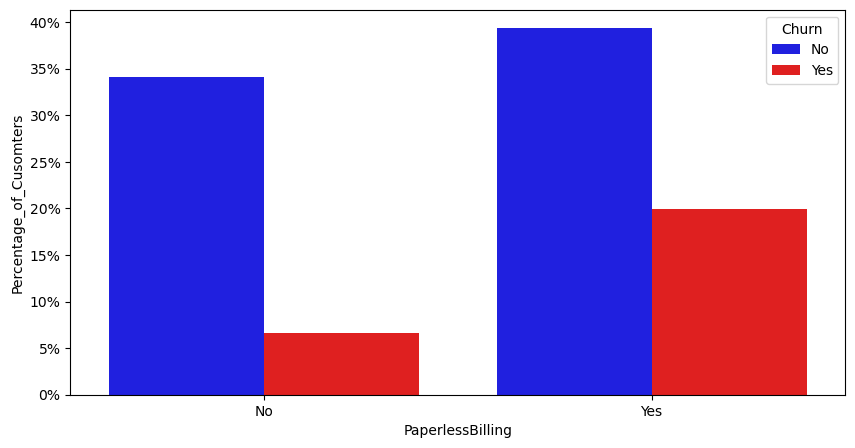

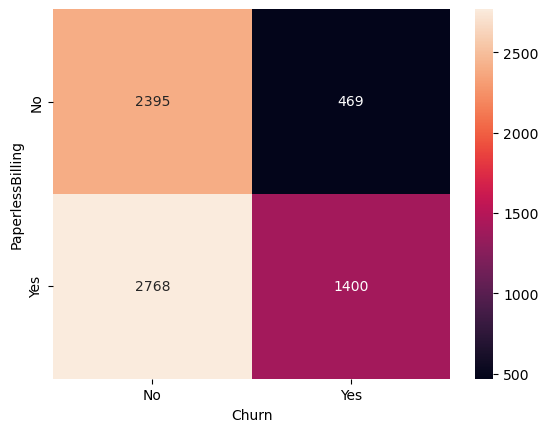

In [54]:
crosstable_groupby('PaperlessBilling')

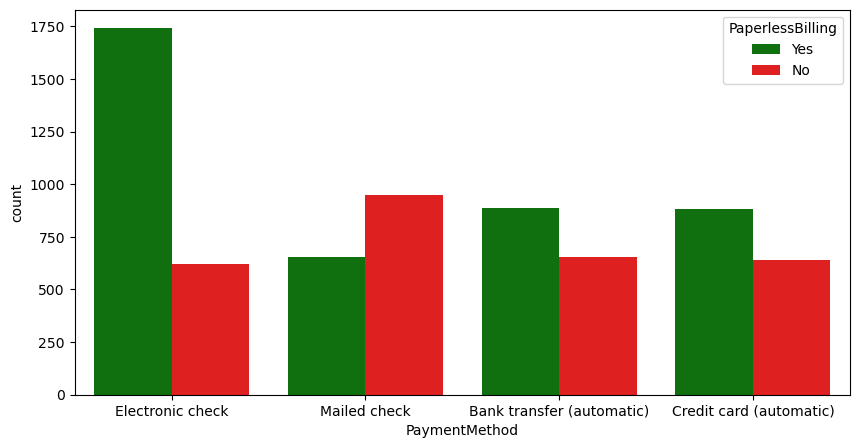

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(x = df['PaymentMethod'], hue = df['PaperlessBilling'], palette=col_pal)
plt.show()

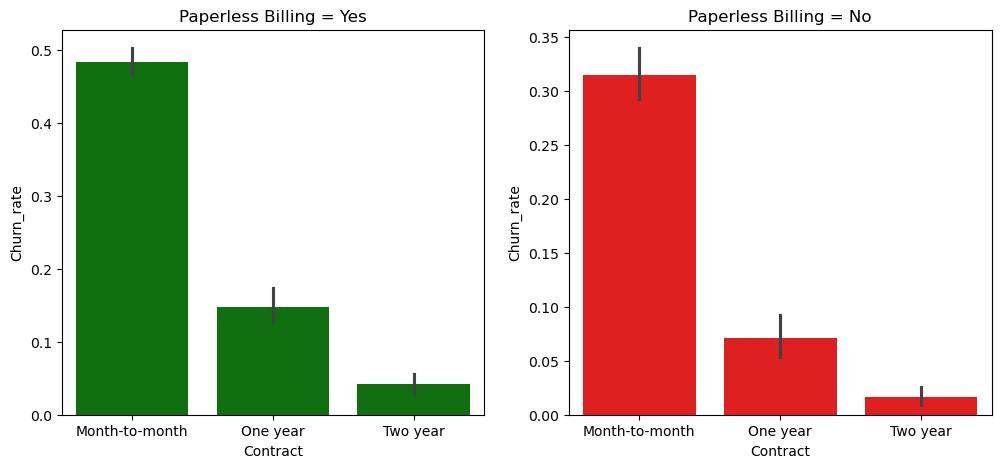

In [56]:
figure, axes = plt.subplots(1, 2, figsize = (12,5))
yes_paperless = df[df['PaperlessBilling'] == 'Yes'][['PaperlessBilling', 'Contract', 'Churn']]
no_paperless = df[df['PaperlessBilling'] == 'No'][['PaperlessBilling', 'Contract', 'Churn']]
yes_paperless['Churn_rate'] = yes_paperless['Churn'].map({'Yes':1 , 'No':0})
no_paperless['Churn_rate'] = no_paperless['Churn'].map({'Yes':1 , 'No':0})
sns.barplot(x = yes_paperless['Contract'], y = yes_paperless['Churn_rate'], ax=axes[0], color = 'green', order=['Month-to-month', 'One year', 'Two year'])
sns.barplot(x = no_paperless['Contract'], y = no_paperless['Churn_rate'], ax = axes[1], color='red', order = ['Month-to-month', 'One year', 'Two year'])
axes[0].set_title(('Paperless Billing = Yes'))
axes[1].set_title(('Paperless Billing = No'))
plt.show()

A few observations:

- Customers with paperless billing are more probable to churn

- The preferred payment method is Electronic check with around 35% of customers. This method also has a very high churn rate

- Short term contracts have higher churn rates

- One and two year contracts probably have contractual fines and therefore customers have to wait untill the end of contract to churn. A time-series dataset would be better to understand this kind of behaviour.

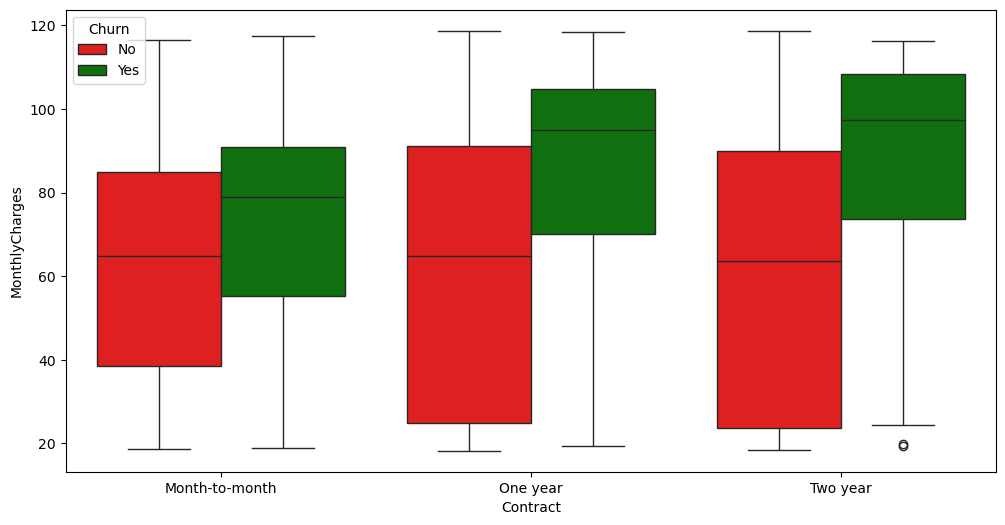

In [57]:
plt.figure(figsize=(12,6))
sns.boxplot(x = df['Contract'], y = df['MonthlyCharges'], hue = df['Churn'], palette=col_pal)
plt.show()

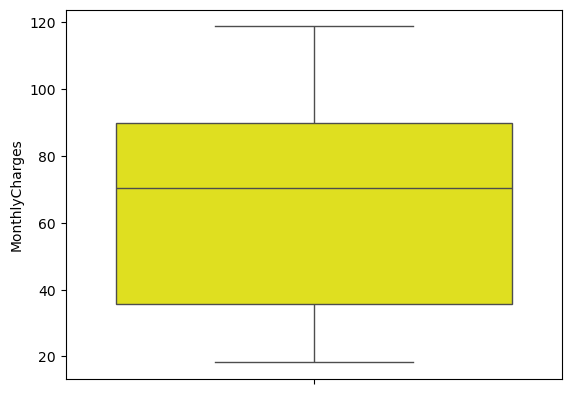

In [58]:
sns.boxplot(df['MonthlyCharges'], color = 'yellow')
plt.show()

### What is Feature Importance? 

Feature importance refers to a set of techniques used in machine learning to identify which features (input variables) have the most significant impact on the prediction of the target variable. Understanding feature importance helps in the following ways:
 
1. **Model Interpretation** : Helps to understand which features are influencing the model’s predictions.
 
2. **Feature Selection** : Identifies the most important features that contribute to the model's accuracy, allowing you to remove less important features, reduce dimensionality, and improve model performance.
 
3. **Insight into Data** : Provides insights into the underlying relationships between features and the target variable, which can be valuable for domain knowledge.

### Methods to Determine Feature Importance 

There are several methods to determine feature importance:
 
1. **Tree-Based Methods** : Algorithms like Random Forest, Gradient Boosting, and Decision Trees naturally rank features based on their ability to improve the model's accuracy by splitting nodes.
 
2. **Permutation Importance** : Measures the increase in the model's prediction error when the values of a single feature are randomly shuffled, thus breaking the relationship between that feature and the target.
 
3. **Model Coefficients** : Linear models like logistic regression can provide coefficients that indicate the importance of each feature.

### How to Apply Feature Importance in a Dataset 

Here is an example of applying feature importance using a Random Forest classifier on a dataset:
 
1. **Data Preprocessing** : Handle missing values, encode categorical variables, and split the data into training and test sets.
 
2. **Train a Model** : Train a Random Forest model.
 
3. **Determine Feature Importance** : Extract feature importance scores from the trained model.
 
4. **Visualize Feature Importance** : Plot the feature importance scores.


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [60]:
labelencoders = {}
cat_cols = df.select_dtypes(include=['object']).columns

In [61]:
df3 = df.copy()
for col in cat_cols:
    labelencoders[col] = LabelEncoder()
    df3[col] = labelencoders[col].fit_transform(df[col])

In [62]:
df2

,variable,Has internet Service?
0,OnlineSecurity,Yes
1,OnlineSecurity,No
2,OnlineSecurity,No
3,OnlineSecurity,No
4,OnlineSecurity,No
...,...,...
10531,StreamingMovies,No
10532,StreamingMovies,No
10533,StreamingMovies,No
10534,StreamingMovies,No


In [63]:
X = df3.drop('Churn', axis = 1)
y = df3['Churn']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
importances = model.feature_importances_

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
18,TotalCharges,0.182353
17,MonthlyCharges,0.181479
4,tenure,0.156175
14,Contract,0.085040
16,PaymentMethod,0.049919
8,OnlineSecurity,0.046860
11,TechSupport,0.043447
0,gender,0.028326
9,OnlineBackup,0.027220
7,InternetService,0.026169


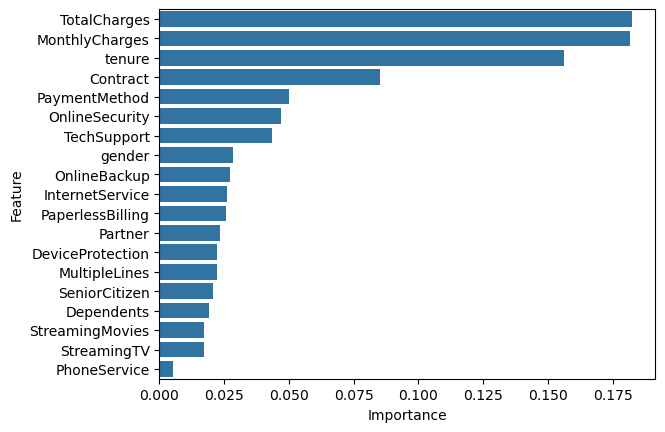

In [67]:
sns.barplot(x = feature_importance['Importance'], y = feature_importance['Feature'])
plt.show()

ENCODING CATEGORCAL FEATURES


### Label Encoding 
`LabelEncoder`**  is used to convert categorical values into numeric labels. Each unique value in the categorical column is assigned an integer value.
#### Use Case: 

- When the categorical variable is ordinal (i.e., there is an intrinsic order to the categories).

- When you have a categorical variable with two values (binary categories) and do not need one-hot encoding.



### One-Hot Encoding 
`pd.get_dummies`**  is used to convert categorical values into a series of binary columns (one column per category). This is known as one-hot encoding.
#### Use Case: 

- When the categorical variable is nominal (i.e., there is no intrinsic order to the categories).

- When you have a categorical variable with more than two values.

- To avoid implying any ordinal relationship between the categories.


### Key Differences 
 
1. **Purpose** : 
  - **Label Encoding** : Encodes each category with an integer value. Suitable for ordinal data.
 
  - **One-Hot Encoding** : Creates binary columns for each category. Suitable for nominal data.
 
2. **Output** : 
  - **Label Encoding** : Single column with integer values.
 
  - **One-Hot Encoding** : Multiple columns (one for each category) with binary values.
 
3. **Use Case** : 
  - **Label Encoding** : When categories have an order or when you have a binary category.
 
  - **One-Hot Encoding** : When categories are independent and there is no order.

### When to Use Each: 
 
- **Label Encoding** :
  - Ordinal data (e.g., 'low', 'medium', 'high').

  - Binary data where you don't need one-hot encoding.
 
- **One-Hot Encoding** :
  - Nominal data (e.g., 'red', 'blue', 'green').

  - When using algorithms that may interpret integer values as ordinal (e.g., linear regression).

In [68]:
df2 =df.copy()
df2['Churn'] = df2['Churn'].map({'Yes':1, 'No':0})

In [69]:
onehot_df = pd.get_dummies(df2)

In [70]:
onehot_df.astype('int')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29,29,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56,1889,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53,108,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42,1840,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70,151,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84,1990,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103,7362,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29,346,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74,306,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [71]:
labelencoding_df = df3.copy()

In [72]:
labelencoding_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


we can use the one hot encoded dataframe for some purposes like : feature importance  

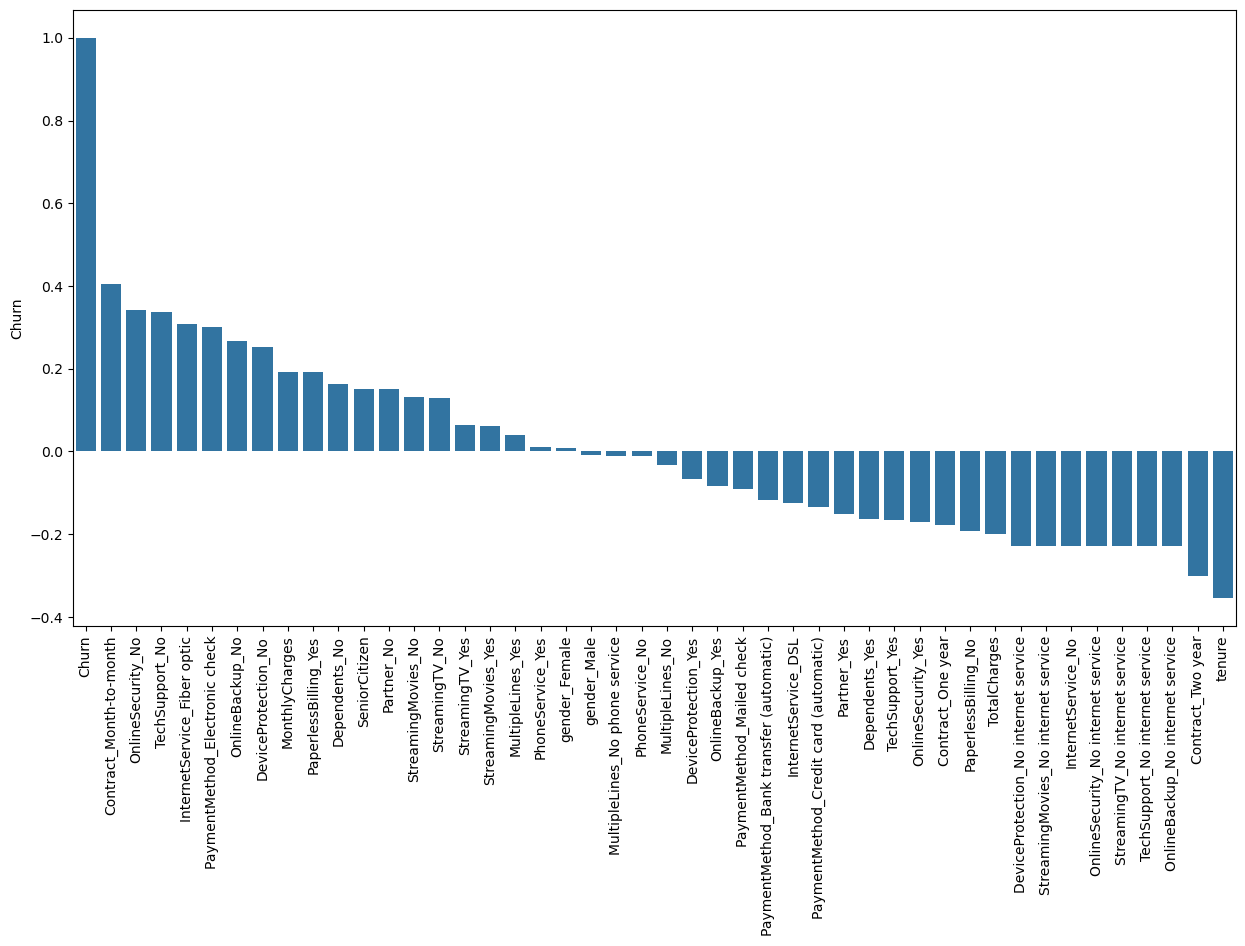

In [73]:
plt.figure(figsize = (15,8))
sns.barplot(onehot_df.corr()['Churn'].sort_values(ascending=False))
plt.xticks(rotation = 90)
plt.show()

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.


We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. Let us summarize some of the interesting features below:

As we saw in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions
Having DSL internet service also reduces the proability of Churn
Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it. I think we need to explore more to better understad why this is happening.

# MODELING

1 - RandomForest Classifier

In [74]:
X = onehot_df.drop('Churn', axis =1).astype('int')
y = onehot_df['Churn'].astype('int')

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

In [77]:
rf_prediction = model_rf.predict(X_test)

In [78]:
from sklearn import metrics
print (metrics.accuracy_score(y_test, rf_prediction))

0.7818052594171997


2 - Support Vector Machine

In [79]:
from sklearn.svm import SVC

model_svc = SVC(kernel='linear')
model_svc.fit(X_train, y_train)

SVC(kernel='linear')

In [80]:
svc_predictions = model_svc.predict(X_test)

In [81]:
print(metrics.accuracy_score(y_test, svc_predictions))

0.7796730632551528


3 - ADA Boost Classifier

In [82]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier()
model_ada.fit(X_train, y_train)

AdaBoostClassifier()

In [83]:
ada_predictions = model_ada.predict(X_test)
print(metrics.accuracy_score(y_test, ada_predictions))

0.7896233120113717


4 - XGboost Classifier

In [84]:
from xgboost import XGBRFClassifier
model_xgboost = XGBRFClassifier()

model_xgboost.fit(X_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [85]:
xgboost_predictions = model_xgboost.predict(X_test)
print(metrics.accuracy_score(y_test, xgboost_predictions))

0.7839374555792467


In [86]:
from keras.models import Sequential
from keras.layers import Dense

In [87]:
model_ann = Sequential([
    Dense(100,input_shape = (45,), activation = 'relu'),
    Dense(50, activation = 'relu'),
    Dense(20, activation  = 'relu'),
    Dense(1, activation = 'sigmoid')
])

2024-07-30 07:46:03.067640: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-30 07:46:06.184570: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-30 07:46:06.185548: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [88]:

model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [89]:
model_ann.fit(X_train, y_train, epochs = 50)

Epoch 1/50


2024-07-30 07:46:15.858317: I external/local_xla/xla/service/service.cc:168] XLA service 0x7984dc62cdb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-30 07:46:15.858407: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2024-07-30 07:46:16.271430: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-30 07:46:17.254597: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1722314778.004672    7538 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


176/176 [==============================] - 11s 3ms/step - loss: 2.6915 - accuracy: 0.7154
Epoch 2/50
176/176 [==============================] - 0s 3ms/step - loss: 1.6886 - accuracy: 0.7337
Epoch 3/50
176/176 [==============================] - 0s 3ms/step - loss: 1.3748 - accuracy: 0.7383
Epoch 4/50
176/176 [==============================] - 0s 3ms/step - loss: 0.7050 - accuracy: 0.7700
Epoch 5/50
176/176 [==============================] - 0s 3ms/step - loss: 0.7891 - accuracy: 0.7609
Epoch 6/50
176/176 [==============================] - 0s 3ms/step - loss: 0.8838 - accuracy: 0.7586
Epoch 7/50
176/176 [==============================] - 0s 3ms/step - loss: 0.9793 - accuracy: 0.7532
Epoch 8/50
176/176 [==============================] - 0s 3ms/step - loss: 0.6992 - accuracy: 0.7739
Epoch 9/50
176/176 [==============================] - 0s 3ms/step - loss: 0.7010 - accuracy: 0.7705
Epoch 10/50
176/176 [==============================] - 0s 3ms/step - loss: 0.8106 - accuracy: 0.7696
Epoch 11/

In [90]:
ann_predictions = model_ann.predict(X_test)
ann_predictions = (ann_predictions > 0.5).astype(int)
ann_predictions

44/44 [==============================] - 0s 1ms/step


array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [91]:
print(metrics.accuracy_score(y_test, ann_predictions))

0.7853589196872779


I still believe that we cann increase this accuracy by doing more data processing like: 

- data scaling 

in addition, when modeling we can use hyperparameter tuning techniques in order to find tuned the default models above.

## ------------------------------------------------------------------------------------------------------------------------------- ##

In [92]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
